In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
import zipfile
import seaborn as sns
sns.set_style("darkgrid")

In [8]:
#path = '/content/drive/MyDrive/breast+cancer+wisconsin+diagnostic.zip'

# Specify the name of the CSV file you want to read from the ZIP archive
csv_file = '/Users/abiolaayuba/Downloads/breast+cancer+wisconsin+diagnostic/wdbc.data'
csv_label = '/Users/abiolaayuba/Downloads/breast+cancer+wisconsin+diagnostic/wdbc.names'
# Extract the CSV file from the ZIP archive
'''with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extract(csv_file, '/content')  # Change '/content' to the desired extraction directory
    #zip_ref.extract(csv_label, '/content')  # Change '/content' to the desired extraction directory'''

# Read the CSV file using pandas
data_file = pd.read_csv(csv_file)
#name_file = pd.read_csv(csv_label)
#dtat_label = pd.read_csv(f'/content/{csv_label}')

In [5]:
categorical_cols = data_file.select_dtypes(include=['object', 'category'])
numerical_cols = numerical_data = data_file.select_dtypes(include=['number'])

In [6]:
#To check for missing values in the dataset
print(f'Missing values: {data_file.isnull().mean()}')

Missing values: 842302      0.0
M           0.0
17.99       0.0
10.38       0.0
122.8       0.0
1001        0.0
0.1184      0.0
0.2776      0.0
0.3001      0.0
0.1471      0.0
0.2419      0.0
0.07871     0.0
1.095       0.0
0.9053      0.0
8.589       0.0
153.4       0.0
0.006399    0.0
0.04904     0.0
0.05373     0.0
0.01587     0.0
0.03003     0.0
0.006193    0.0
25.38       0.0
17.33       0.0
184.6       0.0
2019        0.0
0.1622      0.0
0.6656      0.0
0.7119      0.0
0.2654      0.0
0.4601      0.0
0.1189      0.0
dtype: float64


In [9]:
print(f'Data Shape: {data_file.shape}')

Data Shape: (568, 32)


In [10]:
num_of_features = len(data_file.columns)
features = data_file.columns
print(f'The dataset has {num_of_features} features and the features are: \n {features}')

The dataset has 32 features and the features are: 
 Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')


In [11]:
data_file.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [12]:
data_file.tail()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [13]:
data_file.describe()

,842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
categorical_cols.head()

,M
0,M
1,M
2,M
3,M
4,M


The target Column is the M column which states the condition of the diagnosis, M is for Malign cell while B is for Belign. I want to visualised how this are distributed if there is any bias in the dataset.

In [15]:
print(len(data_file['M']))

568


<Axes: >

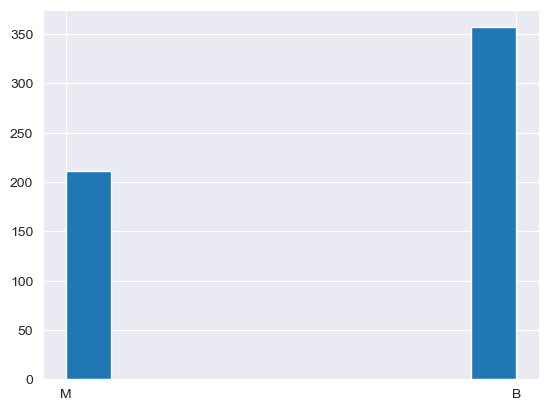

In [16]:
data_file['M'].hist()

In [17]:
#sns.pairplot(data_file.iloc[:,:6],hue=data'M', diag_kind='hist',height=1.6)

In [19]:
corr = data_file.iloc[:,:-1].corr(method="pearson")
corr

ValueError: could not convert string to float: 'M'

<Axes: title={'center': 'Correlation Heatmap to check for Multi-Correlinearity'}>

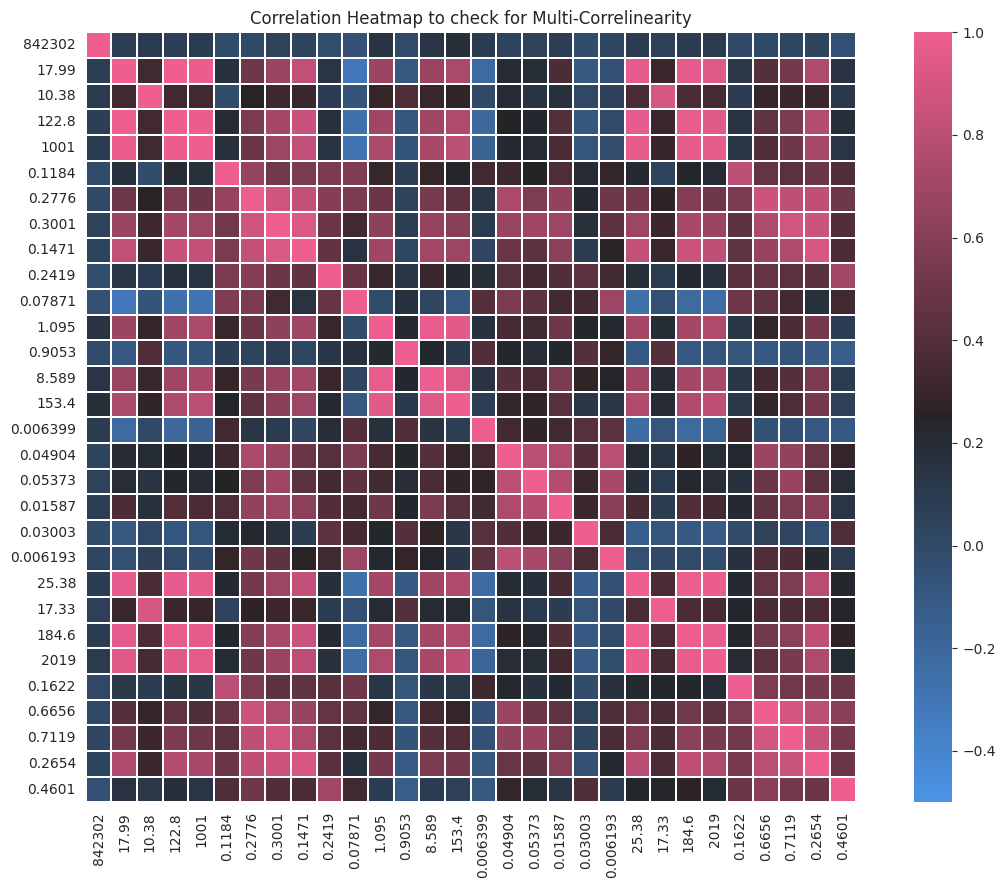

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap to check for Multi-Correlinearity')
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [ ]:
encode_label = LabelEncoder()
data_file['M'] = encode_label.fit_transform(data_file['M'])
data_file.tail()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
corr = data_file.corr()[['M']].sort_values('M',ascending=False)

<Axes: title={'center': 'Features correlating with Malignity'}>

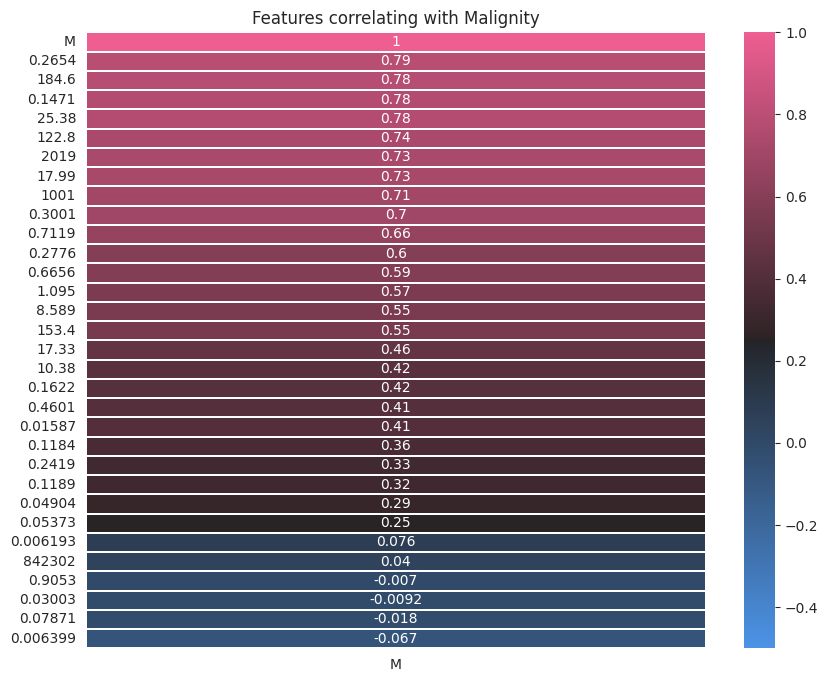

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Features correlating with Malignity')
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, annot=True, linewidths=.2)

In [ ]:
data_file = data_file.drop(columns = ['0.6656','0.7119','0.3001','0.2776','0.05373','0.04904'])
print(f'The new dataset consist of {len(data_file.columns)} features and they are:')
data_file.head()

The new dataset consist of 26 features and they are:


,842302,M,17.99,10.38,122.8,1001,0.1184,0.1471,0.2419,0.07871,...,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.2654,0.4601,0.1189
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07017,0.1812,0.05667,...,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.12790,0.2069,0.05999,...,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.10520,0.2597,0.09744,...,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.10430,0.1809,0.05883,...,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.08089,0.2087,0.07613,...,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.1741,0.3985,0.12440


In [ ]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(data_file.iloc[:,1:], data_file['M'], test_size = 0.3, random_state = random_state)

In [ ]:
Scaler = RobustScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

In [ ]:
pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.line(x=np.arange(1,exp_var_cumul.shape[0]+1), y=exp_var_cumul, markers=True, labels={'x':'# of components', 'y':'Cumulative Explained Variance'})

#fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=30, y0=0.95, y1=0.95)

fig.show()

Optimal number of features : 1


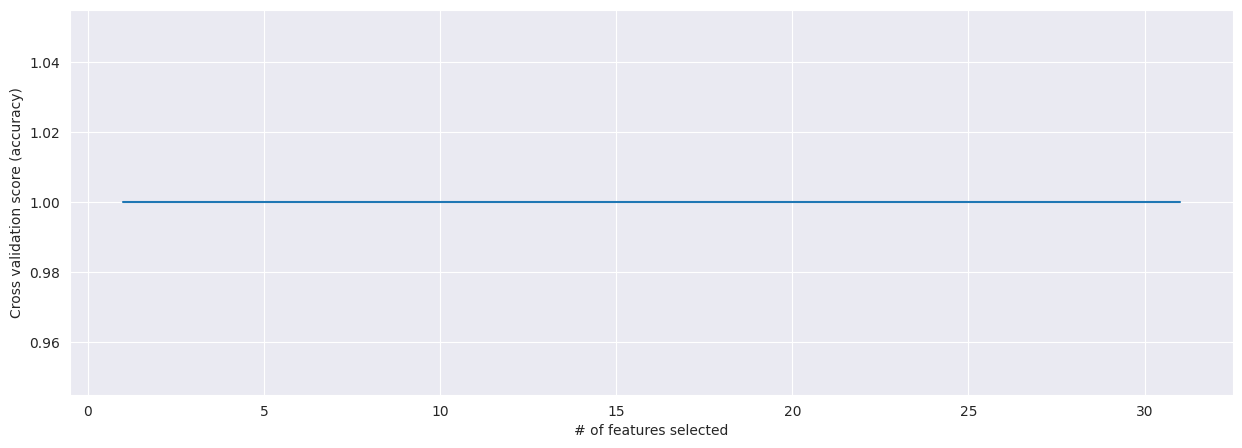

In [ ]:
# Fit the RFE model to identify the optimum number of features .
rfecv = RFECV(cv=StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True),
      estimator=DecisionTreeClassifier(), scoring='accuracy')

rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,5))
plt.xlabel("# of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    rfecv.cv_results_['mean_test_score'],
)
plt.show()

In [ ]:
# Identifying the features RFE selected
'''df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])

for i in range(X_train.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = pd.concat([df_features, pd.DataFrame([row])], ignore_index=True)

df_features.sort_values(by='ranking').head(10)'''


"df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])\n\nfor i in range(X_train.shape[1]):\n    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}\n    df_features = pd.concat([df_features, pd.DataFrame([row])], ignore_index=True)\n\ndf_features.sort_values(by='ranking').head(10)"

In [ ]:
# Identifying the features' name RFE selected
#data_file.columns[1:][rfecv.get_support()]

In [ ]:
def predict(X, W, b):
    return sigmoid(np.dot(W, X) + b)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(W, b):
    m = X_train.shape[0]
    fx = sigmoid(np.dot(X_train, W) + b)
    cost = -np.sum(y_train * np.log(fx) + (1 - y_train) * np.log(1 - fx)) / m
    return cost

def gradient_step(W, b):
    m = X_train.shape[0]
    fx = sigmoid(np.dot(X_train, W) + b)
    dj_dw = np.dot(X_train.T, fx - y_train) / m
    dj_db = np.sum(fx - y_train) / m
    return dj_dw, dj_db


In [ ]:
def gradient_descent(alpha, iterations, init_W, init_b, record_interval):
    local_W = init_W
    local_b = init_b
    cost_history = [cost(local_W, local_b)]

    for i in range(iterations):
        new_W, new_b = gradient_step(local_W, local_b)
        local_W -= alpha * new_W
        local_b -= alpha * new_b

        if i % record_interval == 0:
            local_cost = cost(local_W, local_b)
            print(f"Iteration {i}: Cost = {local_cost}")
            cost_history.append(local_cost)

    return local_W, local_b, cost_history

# Assuming X_train is your feature matrix and y_train is your target variable
# X_train should have shape (m, n), where m is the number of samples and n is the number of features
# y_train should have shape (m,)
#X_train = ...
#y_train = ...

# Set initial weights and hyperparameters
m, n = X_train.shape
W = np.zeros((n,))
b = 0
alpha = 0.001  # Learning rate
iterations = 40000  # Number of iterations
variable_frequency = 1000  # Frequency to record cost

# Perform gradient descent
W, b, cost_history = gradient_descent(alpha, iterations, W, b, variable_frequency)

# Print the final weights and bias
print('Final weights:')
print(W)
print('Final bias:')
print(b)

Iteration 0: Cost = 0.6918999636772982
Iteration 1000: Cost = 0.3506978471281312
Iteration 2000: Cost = 0.2715397230243814
Iteration 3000: Cost = 0.22915780561053073
Iteration 4000: Cost = 0.20148158591784374
Iteration 5000: Cost = 0.18151077107617217
Iteration 6000: Cost = 0.16619849035187428
Iteration 7000: Cost = 0.1539678087174792
Iteration 8000: Cost = 0.14390574874218046
Iteration 9000: Cost = 0.13544035770673993
Iteration 10000: Cost = 0.128191716532861
Iteration 11000: Cost = 0.12189580403096102
Iteration 12000: Cost = 0.1163624403765716
Iteration 13000: Cost = 0.11145058271909608
Iteration 14000: Cost = 0.10705307241558686
Iteration 15000: Cost = 0.10308682183493058
Iteration 16000: Cost = 0.09948627852309759
Iteration 17000: Cost = 0.09619894202242667
Iteration 18000: Cost = 0.09318220969275114
Iteration 19000: Cost = 0.09040110809295517
Iteration 20000: Cost = 0.08782662944699368
Iteration 21000: Cost = 0.08543449079401932
Iteration 22000: Cost = 0.08320419425161898
Iteratio

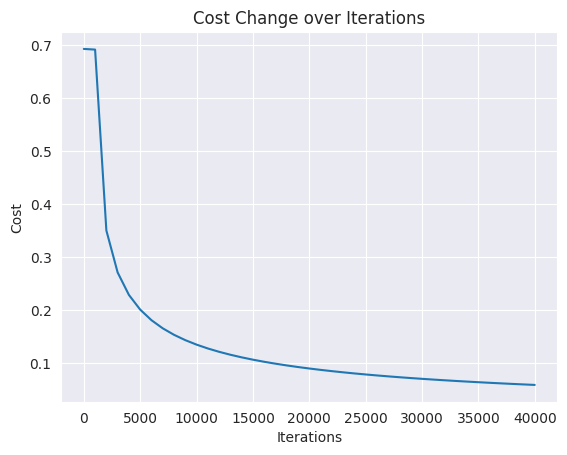

In [ ]:
# Plot the cost change over iterations
plt.plot(range(0, iterations + 1, variable_frequency), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Change over Iterations')
plt.show()

In [ ]:
# Make predictions on the test set
linear_combination = np.dot(X_test, W) + b
probabilities = sigmoid(linear_combination)
predictions = np.where(probabilities >= 0.4, 1, 0)
accuracy = np.mean(predictions == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 98.24561403508771 %
